# Исследование надежности заемщиков

## Описание проекта

`Заказчик` — кредитный отдел банка. 

`Входные данные` от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении `модели кредитного скоринга` — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Задачи 
Определить существует ли зависимость между:
- количеством детей и возвратом кредита в срок
- семейным положением и возвратом кредита в срок
- уровнем дохода и возвратом кредита в срок
- целью кредита и возвратом его в срок


## Описание данных
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

### 1. Откроем файл с данными и изучим общую информацию
Импортируем необходимые библиотеки, считываем данные из csv-файла в датафрейм и сохраняем в переменную data

In [1]:
import pandas as pd
import seaborn as sb
import pylab as pl

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Выведем первые 20 строчек датафрейма data на экран.

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### 2. Предобработка данных
#### Обработка пропущенных значений

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

 В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце мы обработанем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

#### Обработка аномалий
В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`

In [6]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставляем их как есть

#### Выведем перечень уникальных значений столбца `children`

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

#### В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма data

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]
# убедимся, что артефакты удалены
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

#### Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости income_type

In [10]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [11]:
# убедимся, что все пропуски обработаны
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных
#### Заменим вещественный тип данных в столбце 'total_income' на целочисленный 

In [12]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов
#### Обработаем неявные дубликаты в столбце `education`

In [13]:
data['education'] = data['education'].str.lower()
# выведем на экран количество строк-дубликатов
data.duplicated().sum()

71

In [14]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме 
`data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.



In [15]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [16]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

#### Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`

In [17]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

#### Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`

In [18]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [19]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

###  Исследуем данные и определим: 

#### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [20]:
data_pivot_children = data.pivot_table(index= 'children', values= 'debt',\
aggfunc = ['count', 'sum', 'mean'])
data_pivot_children.columns= 'total','debtors','share'
data_pivot_children.reset_index()
# debt — имел ли задолженность по возврату кредитов

,children,total,debtors,share
0,0,14091,1063,0.075438
1,1,4808,444,0.092346
2,2,2052,194,0.094542
3,3,330,27,0.081818
4,4,41,4,0.097561
5,5,9,0,0.000000


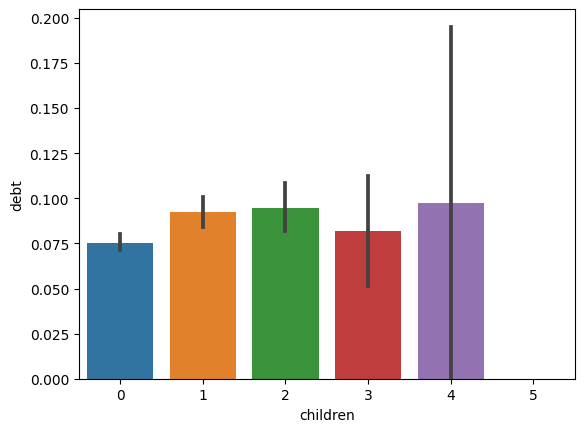

In [21]:
sb.barplot(x=data['children'], y=data['debt']);

**Вывод:**

В данном случае мы не можеи корректно оценить зависимость, так как выбоки с количеством детей 3, 4, 5 малы и сложно оценить их статистическую значимость. 
Если сравнивать группу людей с детьми (с любым количсеством) и без детей, среди первой больше тех, кто имел задолженность по возврату кредитов, но незначительно.
Следоваательно, на данном этапе мы можем предположить, что зависимости между количеством детей и возвращением кредита в срок нет.

#### Есть ли зависимость между семейным положением и возвратом кредита в срок?


In [22]:
data_pivot_family_status = data.pivot_table(index= 'family_status', values= 'debt',\
                      aggfunc = ['count', 'sum', 'mean'])
data_pivot_family_status.columns= 'total','debtors','share'
data_pivot_family_status.reset_index()

,family_status,total,debtors,share
0,Не женат / не замужем,2796,273,0.097639
1,в разводе,1189,84,0.070648
2,вдовец / вдова,951,63,0.066246
3,гражданский брак,4134,385,0.093130
4,женат / замужем,12261,927,0.075606


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'женат / замужем'),
  Text(1, 0, 'гражданский брак'),
  Text(2, 0, 'вдовец / вдова'),
  Text(3, 0, 'в разводе'),
  Text(4, 0, 'Не женат / не замужем')])

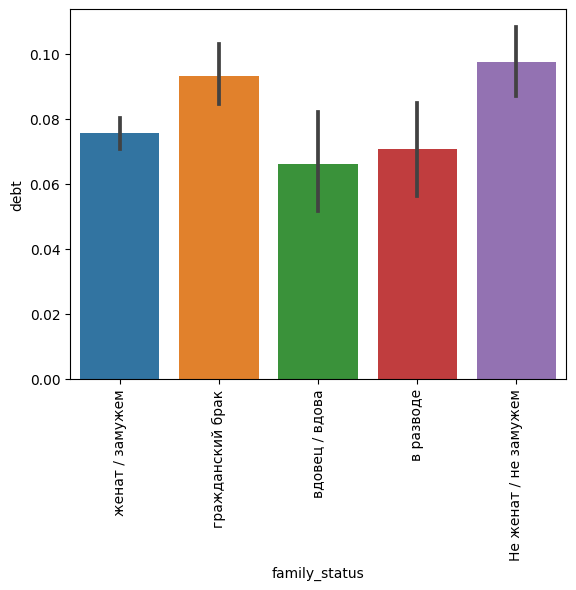

In [23]:
sb.barplot(x=data['family_status'], y=data['debt'])
pl.xticks(rotation = 90) 

**Вывод:**

Прослеживается следующая зависимость между семейным положением и возвратом кредита в срок: 
группы 'Не женат / не замужем' и 'гражданский брак' чаще имеют задолженность по выплате кредитов.

#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [24]:
data_pivot_total_income = data.pivot_table(index= 'total_income_category', values= 'debt',\
                      aggfunc = ['count', 'sum', 'mean'])
data_pivot_total_income.columns= 'total','debtors','share'
data_pivot_total_income.reset_index()


# 0–30 000 — 'E';
# 30 001–50 000 — 'D';
# 50 001–200 000 — 'C';
# 200 001–1 000 000 — 'B';
# 1 000 001 и выше — 'A'

,total_income_category,total,debtors,share
0,A,25,2,0.080000
1,B,5014,354,0.070602
2,C,15921,1353,0.084982
3,D,349,21,0.060172
4,E,22,2,0.090909


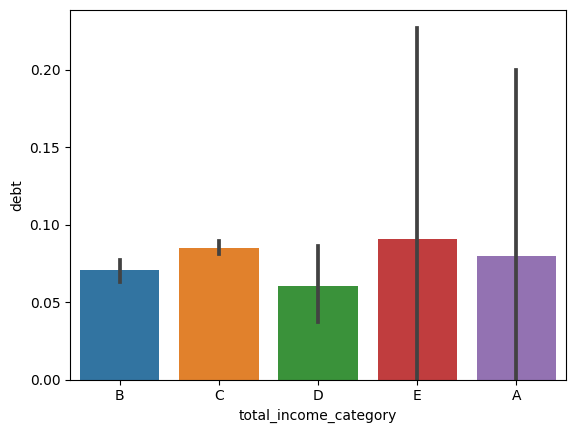

In [25]:
sb.barplot(x=data['total_income_category'], y=data['debt']);

**Вывод:**

Группа А (с доходом более 1 000 001), группа Е (с уровнем дохода 0–30 000), группа С (с доходом 50 001–200 000) демонстрируют высокую долю задолженности по выплате кредитов, однако группы А и Е малочисленны, что не позволяет оценить данные корректно. Меньше "должников" в группе В (с доходом 200 001–1 000 000), самая низкая доля в группе D (доход 30 001–50 000).

#### Как разные цели кредита влияют на его возврат в срок?

In [26]:
data_pivot_purpose = data.pivot_table(index= 'purpose_category', values= 'debt',\
                      aggfunc = ['count', 'sum', 'mean'])
data_pivot_purpose.columns= 'total','debtors','share'
data_pivot_purpose.reset_index()

,purpose_category,total,debtors,share
0,операции с автомобилем,4279,400,0.093480
1,операции с недвижимостью,10751,780,0.072551
2,получение образования,3988,369,0.092528
3,проведение свадьбы,2313,183,0.079118


(array([0, 1, 2, 3]),
 [Text(0, 0, 'операции с недвижимостью'),
  Text(1, 0, 'операции с автомобилем'),
  Text(2, 0, 'получение образования'),
  Text(3, 0, 'проведение свадьбы')])

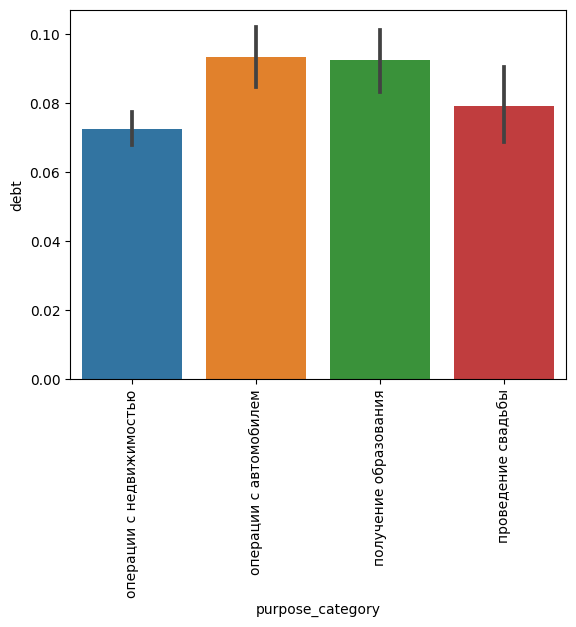

In [27]:
sb.barplot(x=data['purpose_category'], y=data['debt'])
pl.xticks(rotation = 90) 

**Вывод:**
Кредиты на операции с недвижимостью и проведение свадьбы чаще возвращают в срок, в сравнении с кредитами на покупку автомобиля и получение образования.


#### Возможные причины появления пропусков в исходных данных:

В исходных даных мы наблюдали пропуски в 2 столбцах: (days_employed)количество дней трудового стажа и total_income(ежемесячный доход). Причиной может быть сокрытие информации или ошибки ввода данных.

#### Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

В количествееных переменных медиана позволяет более объективно, чем среднее значение, оценить типичные значения выборки. Прежде всего, это относится к случаям, когда в исследуеммых данных встречаются значения намного больше или намного меньше остальных. 
Среднее арифметическое при данных условиях (когда некоторые значения выделяются из большинства) искажено и некорректно характеризует данные.   


## Вывод

**Для оценки вляния различных факторов на факт погашения кредита в срок, было проведено исследование.
Результаты, полученные из анализа статистики платежеспособности клиентов, позволят корректнее построить 
модель кредитного скоринга.**

Нами были выдвинуты следующие **гипотезы**:
- 1. Существует зависимость между количеством детей и возвратом кредита в срок;
- 2. На возврат кредита в срок влияет семейное положение;
- 3. Погашение кредита зависит от уровня дохода заемщика;
- 4. Разные цели кредита влияют на его возврат в срок;
 
**В результате исследования определили:**
- 1. При текущих данных наблюдаем отсутствие прямой зависимости между количеством детей и возвращением кредита в срок. Однако для более точных выводов необходимо проведение дополнительного исследования, с большим объемом выборок заемщиков с 3, 4 и 5 детьми. Текущий объем данных по перечисленным категориям не позволяет дать корректную оценку.
- 2. Чаще задолженность по выплате кредитов имеют группы 'не женат / не замужем'(в 9.7% случаев) и 'гражданский брак'(9.3%). Задолженность категорий клиентов сотоящих в браке(7.6%), в разводе(7.1%) вдов/вдовцов(6.6) наблюдается в меньшей доле, но разница незначительна. 
- 3. Группа А (с доходом более 1 000 001), группа Е (с уровнем дохода 0–30 000), группа С (с доходом 50 001–200 000) демонстрируют высокую долю задолженности по выплате кредитов, однако группы А и Е малочисленны для формирования однозначных выводов. Меньше "должников" в группе В (с доходом 200 001–1 000 000) - 7.1%, самая низкая доля в группе D (доход 30 001–50 000) - 6%.
- 4. Кредиты на операции с недвижимостью(доля задолженностей: 7.2%) и проведение свадьбы(7.9%) чаще возвращают в срок, в сравнении с кредитами на покупку автомобиля(9.3%) и получение образования(9.2%).
    
**Результат:** при формировании модели кредитного скоринга стоит обратить внимание на семейное положение заемщика и цель кредита.  


*Необходимо применение инструментов математической сатистики для проверки достоверности результатов 